# **ML-AI4Econ Course**

We first download the different packages needed for this part of the course:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
import keras
from keras.api.models import Sequential
from keras.api.layers import Dense
from keras.api.regularizers import l2

We also set a random seed for reproducible results:

In [61]:
np.random.seed(24)
tf.random.set_seed(24)

### Neural Networks

Now, we are going to have a look at how to build simple Neural Networks for both regression and classification. Even though this topic is very broad we show some fundamental concepts that students must know to have a sound background when studying things related to these models. As always we will first, start by downloading the data. Here, we are using time series data of the close prices of the SPY.

In [62]:
housing = fetch_california_housing()
X = housing.data       # features (8 features)
y = housing.target
y_class = (y > np.median(y)).astype(int)

We can now divide the data into train and test.

In [63]:
X_train, X_test, y_train, y_test, y_class_train, y_class_test = train_test_split(
    X, y, y_class, test_size=0.2, random_state=24
)

Given that we use a gradient descent-based method (a version of stochastic gradient descent called ADAM), it will be useful to scale our variables for better convergence properties.

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Network Architecture**

A typical neural network is composed of several layers that transform input data into output predictions. Consider a simple regression network with the following structure:

1. **Input Layer:**  
   Receives the input data with $n$ features.

2. **Hidden Layer:**  
   A fully connected (Dense) layer with $h$ units and a non-linear activation function such as ReLU. This layer performs a transformation described by:  
   $$
   z = \text{ReLU}(W_1 x + b_1)
   $$
   where $W_1$ is the weight matrix, $x$ is the input vector, and $b_1$ is the bias vector.

3. **Output Layer:**  
   A Dense layer with one unit for regression. It outputs the prediction as:  
   $$
   \hat{y} = W_2 z + b_2
   $$
   where $W_2$ and $b_2$ are the weights and bias for the output layer.

**Training the Network**

The network is trained on a set of input-output pairs by performing the following steps:

- **Forward Propagation:**  
  The input data is passed through the network to generate predictions $\hat{y}$.

- **Loss Calculation:**  
  A loss function, such as mean squared error (MSE), quantifies the difference between the predicted values and the actual values:  
  $$
  \text{MSE} = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)^2
  $$
  where $N$ is the number of samples.

- **Backpropagation:**  
  Using the chain rule, gradients of the loss with respect to the network's weights are computed. These gradients indicate how to adjust the weights to minimize the loss.

- **Optimization:**  
  An optimizer (e.g., Adam) updates the weights according to the gradient information. The general update rule is:  
  $$
  \theta = \theta - \eta \cdot \nabla_{\theta} \text{loss}
  $$
  where $\theta$ represents the weights and $\eta$ is the learning rate.

**Using Keras**

Keras simplifies neural network development by providing:

- **Layer Abstraction:**  
  Layers (such as Dense) can be added sequentially to build the network.

- **Model Compilation:**  
  The model is compiled by specifying an optimizer (like Adam) and a loss function (such as MSE for regression).

- **Training Interface:**  
  The training process handles batching, epoch management, and validation, allowing you to focus on model design.

- **Evaluation:**  
  After training, the model's performance is evaluated using separate test data.

This approach lets you concentrate on the architecture and hyperparameter tuning, while Keras manages the underlying computations for forward propagation, backpropagation, and optimization.

Let us now construct the Neural Network for regression and classification:

In [65]:
reg_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

reg_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  loss='mse')


clf_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

clf_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

c:\Users\Iker\Desktop\Algoritmos_Perrotes\ML4Econ_Course\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In a neural network, the goal is to minimize a loss function that quantifies the difference between the network's predictions and the actual target values. Two key processes enable this: backpropagation and optimization.

**Backpropagation**

Backpropagation is the algorithm used to compute the gradients of the loss function with respect to each weight in the network. The process consists of the following steps:

1. **Forward Pass:**  
   The input is passed through the network to produce a prediction $\hat{y}$. For a simple network with one hidden layer, the forward pass can be written as:
   $$
   z = \text{ReLU}(W_1 x + b_1)
   $$
   $$
   \hat{y} = W_2 z + b_2
   $$

2. **Loss Calculation:**  
   A loss function measures the error between the predicted value $\hat{y}$ and the true value $y$. For example, the mean squared error (MSE) is defined as:
   $$
   \text{MSE} = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)^2
   $$

3. **Gradient Computation:**  
   Using the chain rule, backpropagation computes the partial derivatives of the loss with respect to each weight. For instance, the gradient of the loss with respect to a weight $w$ is:
   $$
   \frac{\partial \text{loss}}{\partial w} = \frac{\partial \text{loss}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w}
   $$
   These gradients indicate how a small change in the weights will affect the loss.

**Optimization**

Once the gradients are computed, an optimizer updates the weights to reduce the loss. A common optimizer is the Adam optimizer, which combines ideas from momentum and adaptive learning rates. The weight update rule for a parameter $\theta$ is generally given by:
$$
\theta = \theta - \eta \cdot \nabla_{\theta} \text{loss}
$$
where:
- $\theta$ is a weight or bias in the network,
- $\eta$ is the learning rate,
- $\nabla_{\theta} \text{loss}$ is the gradient of the loss with respect to $\theta$.

The optimizer adjusts $\theta$ iteratively until the network converges to a set of weights that minimize the loss.

Hence, backpropagation computes the gradients of the loss function using the chain rule, allowing the network to understand how each weight contributes to the overall error. The optimizer then uses these gradients to update the weights in a direction that reduces the loss, leading to improved performance over time.

We train both models through the fit method, and we store the history of the training for assessing the convergence we were talking about. Then, we plot the so-called "learning curve" for both models to assess convergence visually, even though the algorithm assess it through comparing the changes in the objective function with a small number $\varepsilon > 0$.

Epoch 1/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.5962 - val_loss: 0.3910
Epoch 2/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3829 - val_loss: 0.3728
Epoch 3/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3500 - val_loss: 0.3843
Epoch 4/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3426 - val_loss: 0.3368
Epoch 5/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3261 - val_loss: 0.3328
Epoch 6/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3169 - val_loss: 0.3270
Epoch 7/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3103 - val_loss: 0.3284
Epoch 8/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3097 - val_loss: 0.3290
Epoch 9/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3024 - val_loss: 0.3241
Epoch 10/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2978 - val_loss: 0.3157
Epoch 11/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2948 - val_loss: 0.3234
Epoch 12/50
1032/1032 ━━━━━━━━

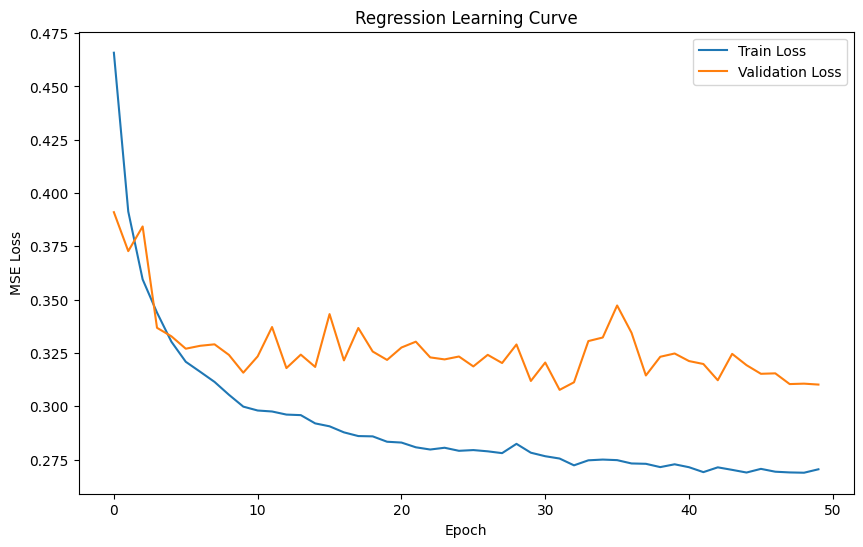

Epoch 1/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8212 - loss: 0.4085 - val_accuracy: 0.8454 - val_loss: 0.3433
Epoch 2/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8520 - loss: 0.3327 - val_accuracy: 0.8517 - val_loss: 0.3358
Epoch 3/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8605 - loss: 0.3223 - val_accuracy: 0.8520 - val_loss: 0.3258
Epoch 4/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8622 - loss: 0.3136 - val_accuracy: 0.8547 - val_loss: 0.3218
Epoch 5/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8647 - loss: 0.3071 - val_accuracy: 0.8547 - val_loss: 0.3230
Epoch 6/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8673 - loss: 0.3015 - val_accuracy: 0.8563 - val_loss: 0.3185
Epoch 7/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8678 - loss: 0.2989 - val_accuracy: 0.8634 - val_loss: 0.3102
Epoch 8/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8725 - loss: 0.2944 - 

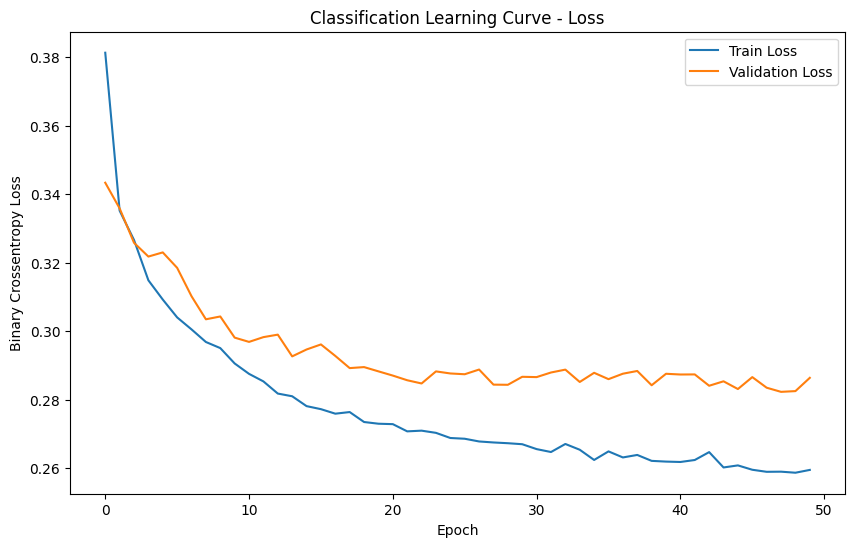

In [66]:
history_reg = reg_model.fit(X_train_scaled, y_train,
                            epochs=50,
                            batch_size=16,
                            validation_data=(X_test_scaled, y_test),
                            verbose=1)

plt.figure(figsize=(10,6))
plt.plot(history_reg.history['loss'], label='Train Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title("Regression Learning Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

history_clf = clf_model.fit(X_train_scaled, y_class_train,
                            epochs=50,
                            batch_size=16,
                            validation_data=(X_test_scaled, y_class_test),
                            verbose=1)

plt.figure(figsize=(10,6))
plt.plot(history_clf.history['loss'], label='Train Loss')
plt.plot(history_clf.history['val_loss'], label='Validation Loss')
plt.title("Classification Learning Curve - Loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()
plt.show()

Now, let us predict with these models:

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Regression Performance Measures:
Mean Squared Error (MSE): 0.3102
Mean Absolute Error (MAE): 0.3823
R-squared (R2 ): 0.7659


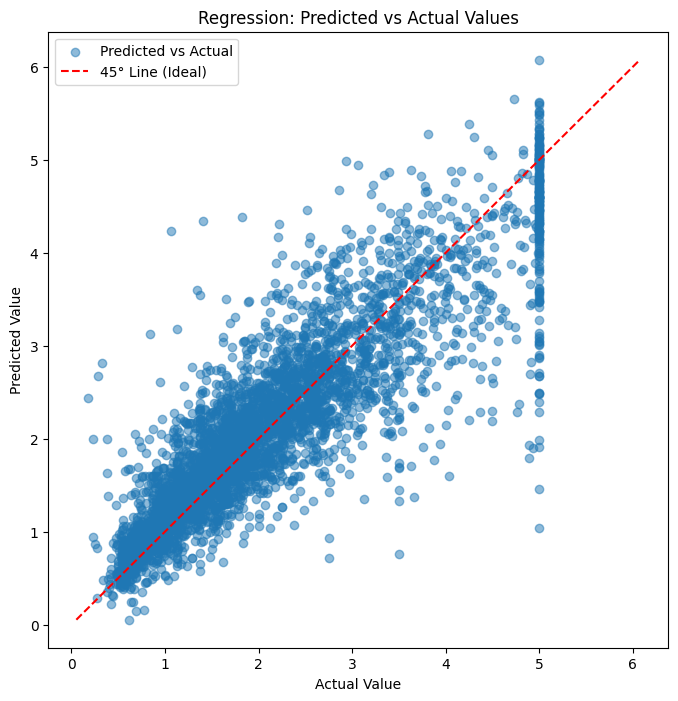

In [67]:
pred_reg = reg_model.predict(X_test_scaled).flatten()

mse = mean_squared_error(y_test, pred_reg)
mae = mean_absolute_error(y_test, pred_reg)
r2  = r2_score(y_test, pred_reg)

print("Regression Performance Measures:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2 ): {r2:.4f}")

min_val = min(y_test.min(), pred_reg.min())
max_val = max(y_test.max(), pred_reg.max())

plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred_reg, alpha=0.5, label='Predicted vs Actual')
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='45° Line (Ideal)')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Regression: Predicted vs Actual Values")
plt.legend()
plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


<Figure size 600x500 with 0 Axes>

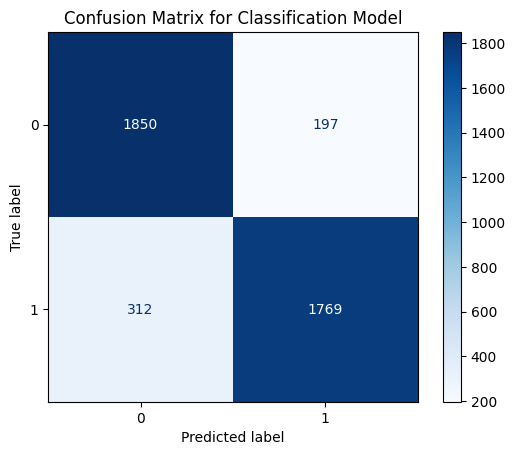


Classification Performance Measures:
Accuracy: 0.8767
Precision: 0.8998
Recall: 0.8501
F1 Score: 0.8742


In [68]:
y_clf_pred = (clf_model.predict(X_test_scaled) > 0.5).astype(int).flatten()

accuracy = accuracy_score(y_class_test, y_clf_pred)
precision = precision_score(y_class_test, y_clf_pred)
recall = recall_score(y_class_test, y_clf_pred)
f1 = f1_score(y_class_test, y_clf_pred)

cm = confusion_matrix(y_class_test, y_clf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Classification Model")
plt.show()

print("\nClassification Performance Measures:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Some of you might ask yourselves whether we can use other concepts that we seen in the course, such as using a different loss functions, regularizing, etc. Even though we do not use raw scikit-learn, we can still do this with Keras and combine functionalities. Look at this example using L2 regularization for our regression neural network model.

c:\Users\Iker\Desktop\Algoritmos_Perrotes\ML4Econ_Course\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.6596 - val_loss: 0.4427
Epoch 2/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.4317 - val_loss: 0.4135
Epoch 3/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4079 - val_loss: 0.4078
Epoch 4/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4030 - val_loss: 0.3939
Epoch 5/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.4004 - val_loss: 0.3934
Epoch 6/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3920 - val_loss: 0.3865
Epoch 7/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3902 - val_loss: 0.4078
Epoch 8/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3914 - val_loss: 0.3766
Epoch 9/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3821 - val_loss: 0.3811
Epoch 10/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3788 - val_loss: 0.3766
Epoch 11/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3773 - val_loss: 0.3816
Epoch 12/50
1032/1032 ━━━━━━━━

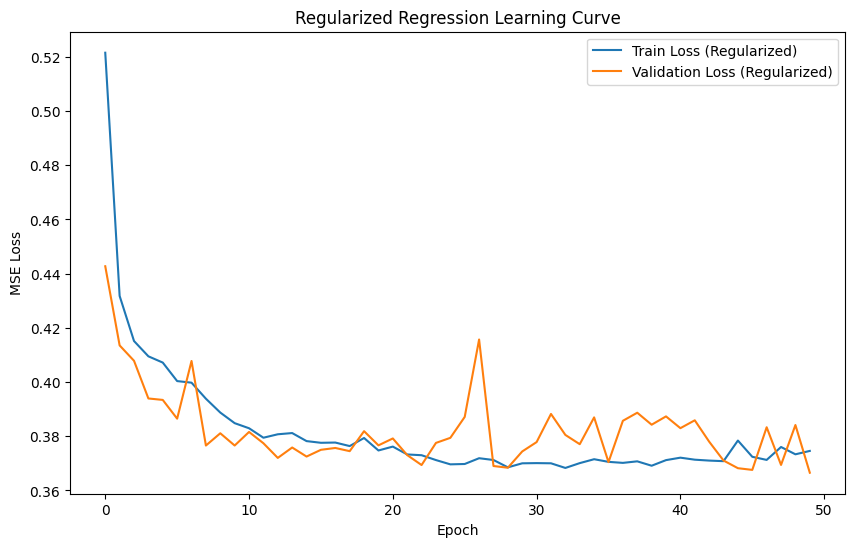

In [69]:
reg_model_reg = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='linear')
])

reg_model_reg.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                      loss='mse')

history_reg_reg = reg_model_reg.fit(X_train_scaled, y_train,
                                    epochs=50,
                                    batch_size=16,
                                    validation_data=(X_test_scaled, y_test),
                                    verbose=1)

plt.figure(figsize=(10,6))
plt.plot(history_reg_reg.history['loss'], label='Train Loss (Regularized)')
plt.plot(history_reg_reg.history['val_loss'], label='Validation Loss (Regularized)')
plt.title("Regularized Regression Learning Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Regularized Regression Performance Measures:
Mean Squared Error (MSE): 0.3368
Mean Absolute Error (MAE): 0.4148
R-squared (R2): 0.7458


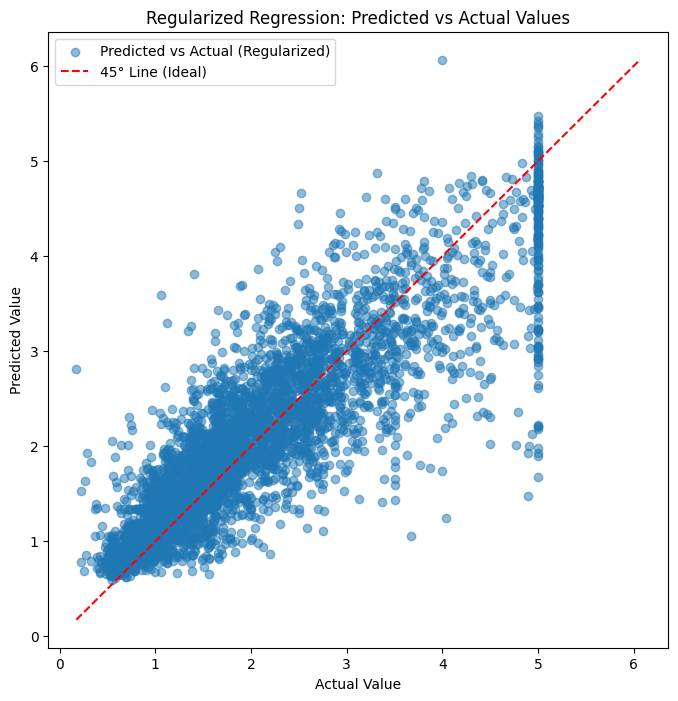

In [70]:
pred_reg_reg = reg_model_reg.predict(X_test_scaled).flatten()

mse_reg = mean_squared_error(y_test, pred_reg_reg)
mae_reg = mean_absolute_error(y_test, pred_reg_reg)
r2_reg  = r2_score(y_test, pred_reg_reg)

print("Regularized Regression Performance Measures:")
print(f"Mean Squared Error (MSE): {mse_reg:.4f}")
print(f"Mean Absolute Error (MAE): {mae_reg:.4f}")
print(f"R-squared (R2): {r2_reg:.4f}")

min_val_reg = min(y_test.min(), pred_reg_reg.min())
max_val_reg = max(y_test.max(), pred_reg_reg.max())

plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred_reg_reg, alpha=0.5, label='Predicted vs Actual (Regularized)')
plt.plot([min_val_reg, max_val_reg], [min_val_reg, max_val_reg], 'r--', label='45° Line (Ideal)')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Regularized Regression: Predicted vs Actual Values")
plt.legend()
plt.show()

# Exercises

Now there are a bunch of exercises for testing your understanding. Please do not use LLMs or ChatGPT to answer them (unless you are explicitly ordered to do so), but look at the documentation of different packages and websites for a better control of Python packages for ML \& AI.

### **Exercise 1: Perceptron Fundamentals**
**Objective:** Understand the basic unit of a neural network.
- Describe the structure and functioning of a single perceptron.
- Write the mathematical equation for a perceptron (including weights, bias, and activation).

### **Exercise 2: Activation Functions**
**Objective:** Know different activation functions and their roles.
- List and explain at least three common activation functions (sigmoid, tanh, ReLU).
- Plot these functions over a range (e.g., from -5 to 5) to compare their behaviors.

### **Exercise 3: Multi-Layer Perceptron Essentials**
**Objective:** Understand how hidden layers enable neural networks to solve complex tasks.
- Describe the architecture of a multi-layer perceptron (MLP).
- Explain the concept of forward propagation through successive layers.

### **Exercise 4: The Backpropagation Algorithm**
**Objective:** Learn how a network learns from errors.
- Explain the process of backpropagation and how gradients are computed and propagated.
- Write down the chain rule formula used for updating weights.

### **Exercise 5: Loss Functions and Optimizers**
**Objective:** Comprehend the functions that guide network training.
- Compare two loss functions (for example, mean squared error vs. cross-entropy) and their typical use cases.
- Discuss the role of optimization algorithms such as SGD or Adam in training neural networks.

### **Exercise 6: Regularization Techniques**
**Objective:** Understand strategies to reduce overfitting.
- Explain how L2 regularization modifies the loss function.
- Describe the purpose and effect of dropout during model training.

### **Exercise 7: Weight Initialization Strategies**
**Objective:** Understand why proper weight initialization is key to training deep models.
- Discuss the impact of initializing weights randomly versus using methods like He or Xavier initialization.
- Explain the potential problems associated with poor weight initialization.

### **Exercise 8: Learning Rate and Hyperparameter Tuning**
**Objective:** Grasp the significance of the learning rate in model convergence.
- Explain how the learning rate affects training speed and convergence.
- Propose strategies for tuning hyperparameters, including using techniques such as learning rate schedules or adaptive learning rates.

### **Exercise 9: Overfitting vs. Underfitting**
**Objective:** Identify and mitigate fitting issues in neural networks.
- Define overfitting and underfitting and list their symptoms in training/validation curves.
- Recommend methods to address overfitting (e.g., increased data, model simplification, regularization).

### **Exercise 10: Evaluation Metrics for Neural Networks**
**Objective:** Learn how to evaluate model performance effectively.
- List at least two evaluation metrics for regression (e.g., MSE, MAE) and two for classification (e.g., accuracy, F1-score).
- Explain how these metrics can be used to monitor and improve model performance.

### **Exercise 11: Experimenting with Alternative Activation Functions**
**Objective:** Expand knowledge on activation functions beyond the basics.
- Implement a neural network using an alternative activation function such as LeakyReLU or ELU.
- Compare the training behavior and performance with that of a network using ReLU activation.

### **Exercise 12: Designing Networks with Multiple Outputs**
**Objective:** Explore architectures that support multi-task learning.
- Build a neural network that uses shared hidden layers but has two separate output layers for different tasks.
- Discuss the benefits and potential challenges of training a network with multiple output branches.